OBJECTIVE:

This project implements a Convolutional Neural Network (CNN) for classifying images from the Fashion MNIST dataset. The main goal is to experiment with different hyperparameters (filter size, regularization strength, batch size, and optimizer) to analyze their impact on model performance.

Description of the Model:

The model is a Convolutional Neural Network (CNN) built using TensorFlow and Keras. It follows a standard CNN architecture designed for image classification:

1. Convolutional Layers:
The model starts with a Conv2D layer with 32 filters and a kernel size of either 3x3 or 5x5 (depending on the hyperparameter setting).
A second Conv2D layer with 64 filters is added.
Both convolutional layers use ReLU activation and L2 regularization (with values 0.0001 or 0.001) to prevent overfitting.

2. Pooling Layers:
Each convolutional layer is followed by a MaxPooling2D layer (2x2) to reduce spatial dimensions and computational load.

3. Fully Connected Layers:
After flattening the feature maps, a Dense layer with 128 neurons and ReLU activation is added to learn high-level features.
The final output layer has 10 neurons with softmax activation, corresponding to the 10 classes in Fashion MNIST.

4. Optimizer & Loss Function:
The model uses either Adam or SGD optimizer (depending on the experiment).
The loss function is sparse_categorical_crossentropy since this is a multi-class classification problem.



Description of Code:

1. Data Loading & Preprocessing:
The Fashion MNIST dataset is loaded using keras.datasets.fashion_mnist.
The pixel values of images are normalized (divided by 255.0) to bring them to the range [0,1].
The dataset is reshaped to add a channel dimension (from (28,28) to (28,28,1)) for compatibility with the CNN.


2. Defining the CNN Model:
A function create_model is implemented, allowing customization of hyperparameters:
filter_size: Defines kernel size (3x3 or 5x5).
regularization: Applies L2 regularization to prevent overfitting.
optimizer: Defines the optimization algorithm (Adam or SGD).
The model is compiled with sparse_categorical_crossentropy loss and accuracy as the evaluation metric.

3. Hyperparameter Tuning & Training:
Four hyperparameters are tested in various combinations:
Filter sizes: [3, 5]
Regularization values: [0.0001, 0.001]
Batch sizes: [32, 64]
Optimizers: ['adam', 'sgd']

A nested loop iterates over all possible configurations, training a model for each.
Each model is trained for 5 epochs with validation data included.
The test accuracy for each model is recorded and printed.

4. Performance Visualization:
The validation accuracy for each hyperparameter combination is plotted using Matplotlib.
This helps visualize how different configurations affect the model’s performance.



Performance Evaluation:

Each model's performance is evaluated based on validation accuracy.
Test accuracy is recorded for all experiments.
A plot is generated to compare how hyperparameter choices affect validation accuracy across epochs.



MY COMMENTS:

Filter Size (3x3 vs 5x5):
A 3x3 filter is smaller and faster. It works well for most tasks and helps avoid overfitting.
A 5x5 filter looks at a bigger area of the image, which might help learn more details, but it’s slower and can sometimes overfit the data.

Regularization (None vs L2 = 0.001):

L2 regularization helps prevent overfitting by keeping the model’s weights small.
Using no regularization lets the model learn freely, but it might memorize the training data instead of learning patterns.

Batch Size (32 vs 64):

Batch size 32 trains slower but often gives better results in the long run.
Batch size 64 trains faster but may not perform as well on new, unseen data.

Optimizer (Adam vs SGD):

Adam is fast and easy to use—it usually gives good results without much tuning.
SGD is slower and needs more tweaking (like setting the right learning rate), but it can sometimes give better results.

Limitations of This Experiment:
Short Training Time:
The models are trained for only 10 epochs, which might not be enough. Training longer could improve accuracy.

Limited Testing of Options:
Only a few values for each setting (like filter size and batch size) are tested. Trying more combinations could give better insights.

Simple Dataset:
This experiment uses Fashion MNIST, which has small, black-and-white images. The results might be very different on colorful or more complex datasets like CIFAR-10.

GPU Use:
The code checks for a GPU to speed things up, but how fast it runs depends on whether a GPU is actually available.

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filter Size 3 - Final Loss: 0.3014, Final Accuracy: 91.17%


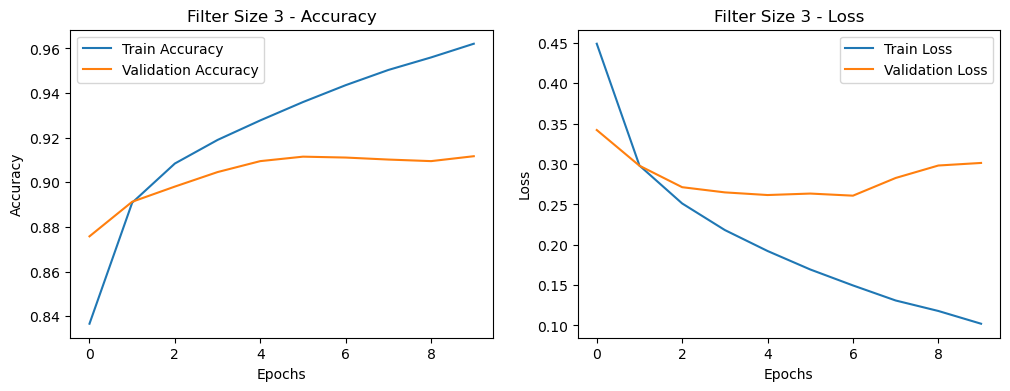

Filter Size 5 - Final Loss: 0.2818, Final Accuracy: 91.46%


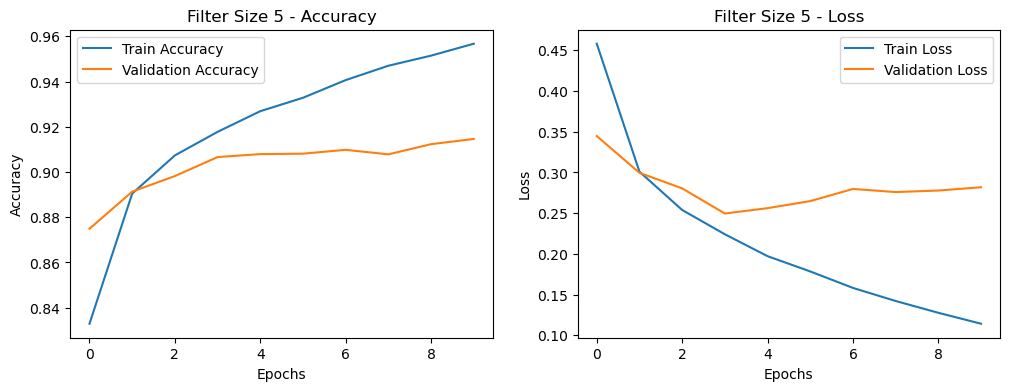

Regularization None - Final Loss: 0.2882, Final Accuracy: 91.26%


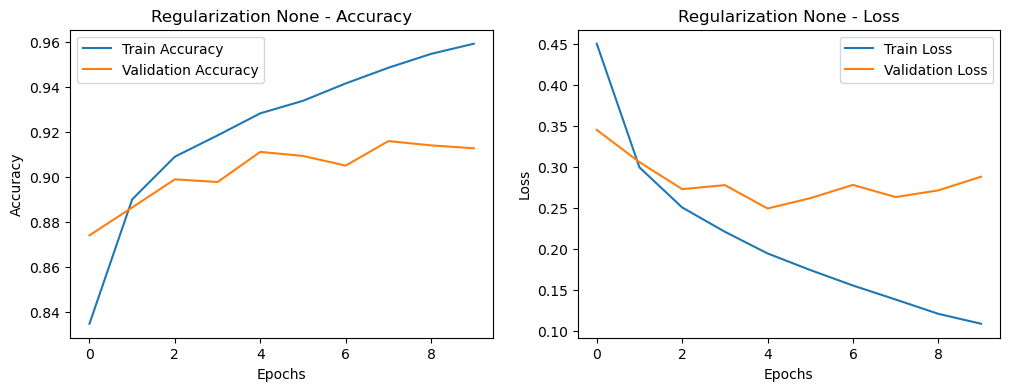

Regularization L2 - Final Loss: 0.4035, Final Accuracy: 88.36%


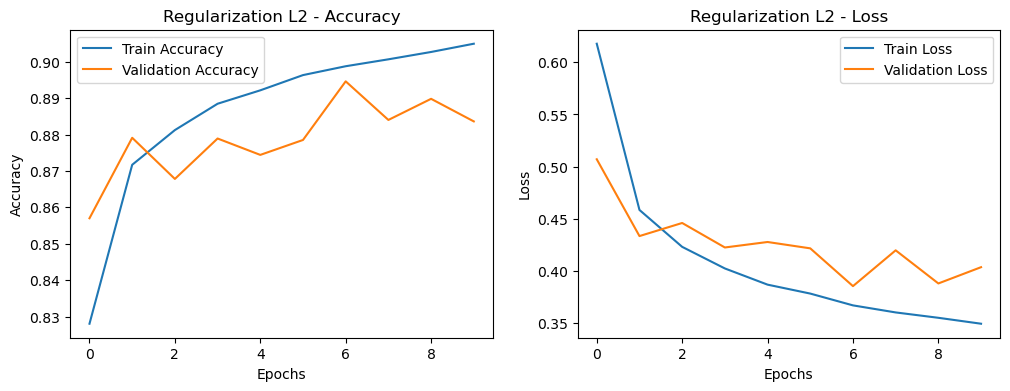

Batch Size 32 - Final Loss: 0.2723, Final Accuracy: 91.68%


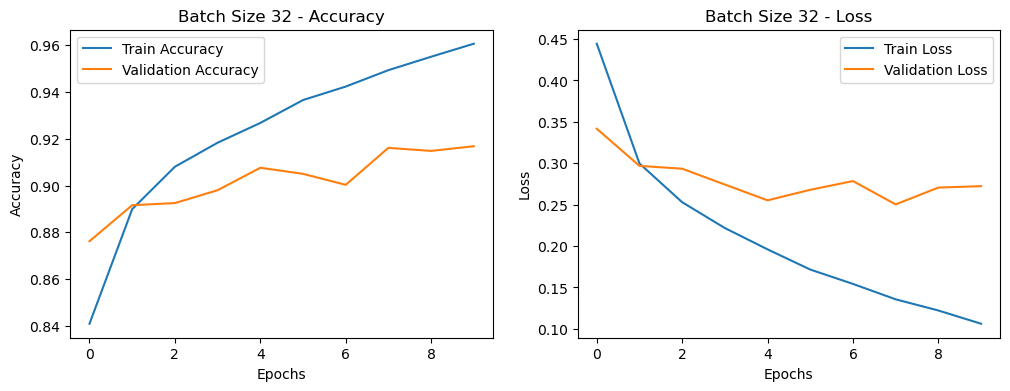

Batch Size 64 - Final Loss: 0.2569, Final Accuracy: 91.32%


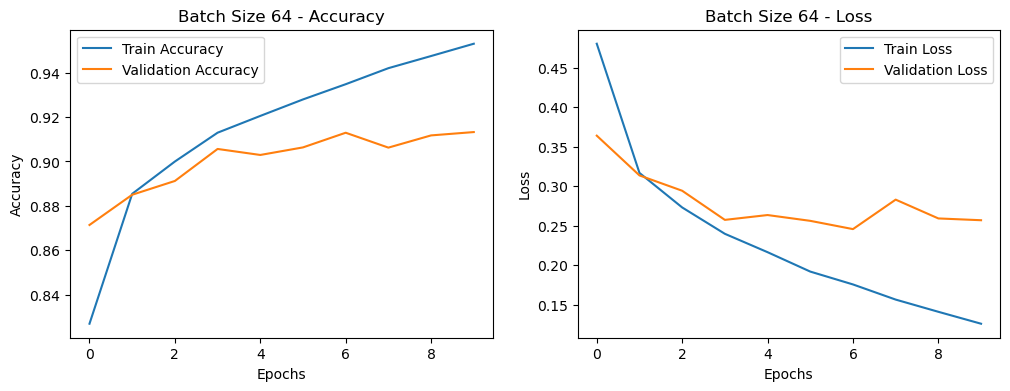

Optimizer ADAM - Final Loss: 0.3197, Final Accuracy: 90.12%


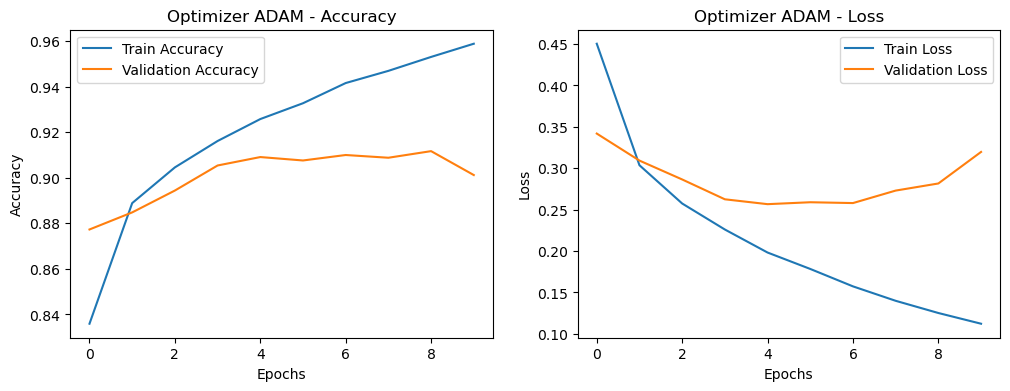

Optimizer SGD - Final Loss: 0.3390, Final Accuracy: 87.67%


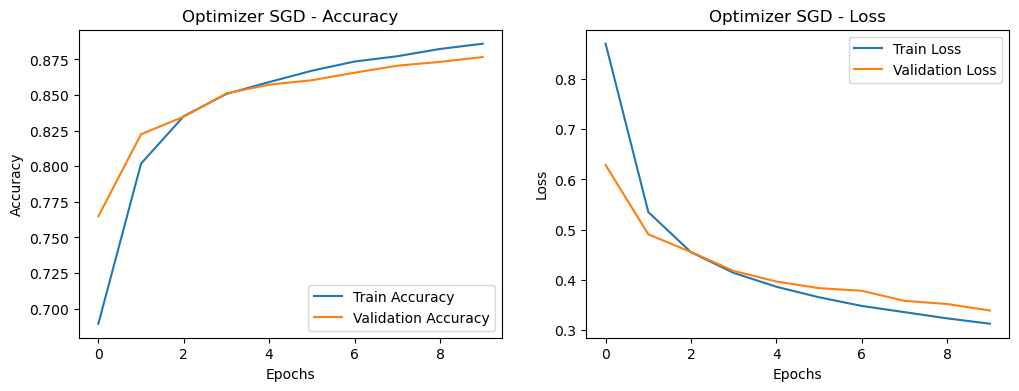

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np

# Enable GPU acceleration
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)

# Load Fashion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Function to create a CNN model
def create_cnn(filter_size=3, reg=None, optimizer='adam'):
    model = keras.Sequential([
        layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28, 28, 1),
                      kernel_regularizer=reg),
        layers.MaxPooling2D(2, 2),
        layers.Conv2D(64, (filter_size, filter_size), activation='relu', kernel_regularizer=reg),
        layers.MaxPooling2D(2, 2),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=reg),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to train and evaluate model
def train_and_plot(model, batch_size=32, title="Model Performance"):
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size,
                        validation_data=(x_test, y_test), verbose=0)

    # Evaluate final loss and accuracy
    final_loss, final_accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f'{title} - Final Loss: {final_loss:.4f}, Final Accuracy: {final_accuracy * 100:.2f}%')

    # Plot accuracy and loss curves
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.title(title + ' - Accuracy')

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.title(title + ' - Loss')

    plt.show()

# Test different filter sizes
for size in [3, 5]:
    model = create_cnn(filter_size=size)
    train_and_plot(model, title=f'Filter Size {size}')

# Test different regularization techniques
for reg in [None, regularizers.l2(0.001)]:
    model = create_cnn(reg=reg)
    train_and_plot(model, title=f'Regularization {"L2" if reg else "None"}')

# Test different batch sizes
for batch in [32, 64]:
    model = create_cnn()
    train_and_plot(model, batch_size=batch, title=f'Batch Size {batch}')

# Test different optimizers
for opt in ['adam', 'sgd']:
    model = create_cnn(optimizer=opt)
    train_and_plot(model, title=f'Optimizer {opt.upper()}')